In [1]:
import pandas, warnings

import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

annot = True

In [2]:
reader = lambda url, **multiargs : pandas.read_table(url, sep=",", **multiargs)

tanggal = ["Date"]

url = "/content/online_retail.csv"

origin = reader(url, parse_dates=tanggal)

origin.iloc[:5, :4]

,Invoice,Stock,Description,Quantity
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12
1,489434,79323P,PINK CHERRY LIGHTS,12
2,489434,79323W,WHITE CHERRY LIGHTS,12
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24


In [3]:
origin.iloc[:5, 4:]

,Date,Price,Customer,Country
0,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
null = origin.isnull().sum()

null.sum()

0

In [5]:
origin["Total"] = origin["Quantity"] * origin["Price"]

origin.iloc[:5, 5:]

,Price,Customer,Country,Total
0,6.95,13085.0,United Kingdom,83.4
1,6.75,13085.0,United Kingdom,81.0
2,6.75,13085.0,United Kingdom,81.0
3,2.10,13085.0,United Kingdom,100.8
4,1.25,13085.0,United Kingdom,30.0


In [6]:
origin["Total"].min()

0.0

### ```Single```

In [7]:
oten = origin[origin["Date"].dt.year == 2011]

oten["Date"].dt.year.unique().tolist()

[2011]

In [8]:
import datetime

seter = lambda i : datetime.datetime(i.year, i.month, 1)

oten["OrderMonth"] = oten["Date"].apply(seter)

grouper = oten.groupby("Customer")["OrderMonth"]

oten["CustomerMonth"] = grouper.transform("min")

oten.iloc[:5, 6:]

,Customer,Country,Total,OrderMonth,CustomerMonth
433855,13313.0,United Kingdom,19.5,2011-01-01,2011-01-01
433856,13313.0,United Kingdom,10.5,2011-01-01,2011-01-01
433857,13313.0,United Kingdom,10.5,2011-01-01,2011-01-01
433858,13313.0,United Kingdom,10.5,2011-01-01,2011-01-01
433859,13313.0,United Kingdom,12.5,2011-01-01,2011-01-01


In [9]:
oten[oten["Customer"] == 13313.0]["CustomerMonth"].nunique()

1

In [10]:
def getime(cols): return cols.dt.year, cols.dt.month

order_year, order_month = getime(oten["OrderMonth"])

custear, custom = getime(oten["CustomerMonth"])

orit = order_year - custear

orti = order_month - custom

oten["Cluster"] = orit * 12 + orti + 1

oten.iloc[:5, 6:]

,Customer,Country,Total,OrderMonth,CustomerMonth,Cluster
433855,13313.0,United Kingdom,19.5,2011-01-01,2011-01-01,1
433856,13313.0,United Kingdom,10.5,2011-01-01,2011-01-01,1
433857,13313.0,United Kingdom,10.5,2011-01-01,2011-01-01,1
433858,13313.0,United Kingdom,10.5,2011-01-01,2011-01-01,1
433859,13313.0,United Kingdom,12.5,2011-01-01,2011-01-01,1


In [11]:
oten["Cluster"].unique().tolist()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [12]:
grouper = oten.groupby(["CustomerMonth", "Cluster"])

customer = grouper["Customer"].apply(pandas.Series.nunique)

customer = customer.reset_index()

customer.iloc[:5]

,CustomerMonth,Cluster,Customer
0,2011-01-01,1,741
1,2011-01-01,2,262
2,2011-01-01,3,319
3,2011-01-01,4,284
4,2011-01-01,5,339


In [13]:
custom = customer.pivot(index="CustomerMonth", columns="Cluster", values="Customer")

custom.iloc[:5, :5]

Cluster,1,2,3,4,5
CustomerMonth,,,,,
2011-01-01,741.0,262.0,319.0,284.0,339.0
2011-02-01,496.0,116.0,123.0,169.0,155.0
2011-03-01,539.0,88.0,144.0,120.0,123.0
2011-04-01,361.0,85.0,79.0,85.0,76.0
2011-05-01,319.0,58.0,56.0,58.0,70.0


In [14]:
custom.index = custom.index.astype("str")

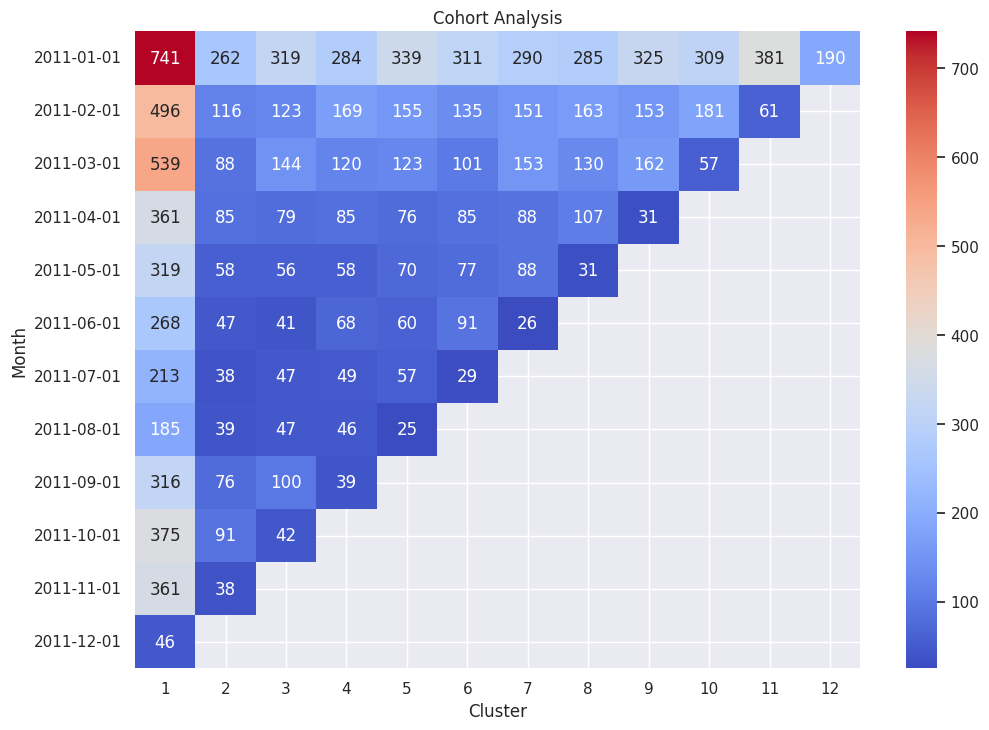

In [15]:
import seaborn as sns

sns.set_theme(rc={'figure.figsize':(11.7,8.27)})

custicorr = sns.heatmap(custom, annot=annot, cmap="coolwarm", fmt=".0f")

custicorr.set_title("Cohort Analysis")

custicorr.set_ylabel("Month")

custicorr.set_xlabel("Cluster");

In [16]:
custi = custom.iloc[:, 0]

retention = custom.divide(custi, axis="rows")

retention = retention.round(3)

retention.iloc[:5, :5]

Cluster,1,2,3,4,5
CustomerMonth,,,,,
2011-01-01,1.0,0.354,0.430,0.383,0.457
2011-02-01,1.0,0.234,0.248,0.341,0.312
2011-03-01,1.0,0.163,0.267,0.223,0.228
2011-04-01,1.0,0.235,0.219,0.235,0.211
2011-05-01,1.0,0.182,0.176,0.182,0.219


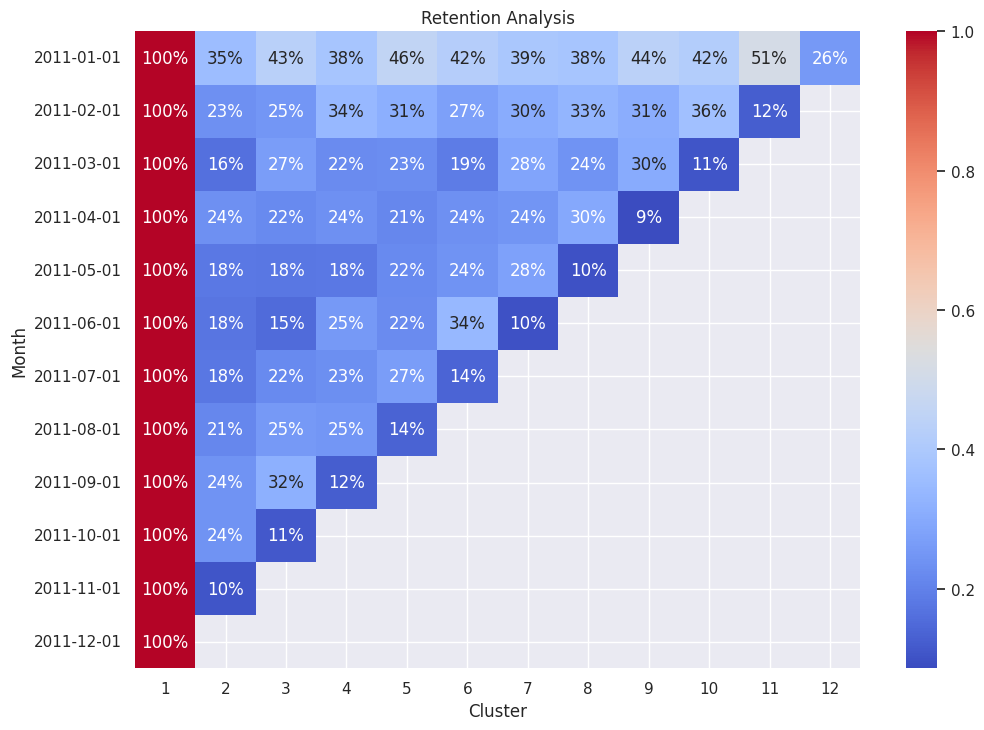

In [17]:
retention_corr = sns.heatmap(retention, annot=annot, cmap="coolwarm", fmt=".0%")

retention_corr.set_title("Retention Analysis")

retention_corr.set_ylabel("Month")

retention_corr.set_xlabel("Cluster");

### ```Quarter```

In [18]:
origin.iloc[:5, 5:]

,Price,Customer,Country,Total
0,6.95,13085.0,United Kingdom,83.4
1,6.75,13085.0,United Kingdom,81.0
2,6.75,13085.0,United Kingdom,81.0
3,2.10,13085.0,United Kingdom,100.8
4,1.25,13085.0,United Kingdom,30.0


In [19]:
origin = origin[origin["Date"].dt.year != 2009]

origin["Date"].dt.year.unique().tolist()

[2010, 2011]

In [20]:
origin["OrderQuarter"] = origin["Date"].dt.year.astype("str") + " 0" + origin["Date"].dt.quarter.astype("str")

origin.iloc[:5, 5:]

,Price,Customer,Country,Total,OrderQuarter
30761,4.50,12346.0,United Kingdom,22.5,2010 01
30762,4.50,12346.0,United Kingdom,22.5,2010 01
30763,2.55,14590.0,United Kingdom,91.8,2010 01
30764,4.25,14590.0,United Kingdom,51.0,2010 01
30765,2.55,14590.0,United Kingdom,5.1,2010 01


In [21]:
origin["OrderQuarter"].unique().tolist()[:4]

['2010 01', '2010 02', '2010 03', '2010 04']

In [22]:
origin["OrderQuarter"].unique().tolist()[4:]

['2011 01', '2011 02', '2011 03', '2011 04']

In [23]:
quarters_map = dict(zip(origin['OrderQuarter'].unique(), range(len(origin['OrderQuarter'].unique()))))

origin['OrderQuarterID'] = origin['OrderQuarter'].map(quarters_map)

origin.iloc[:5, 5:]

,Price,Customer,Country,Total,OrderQuarter,OrderQuarterID
30761,4.50,12346.0,United Kingdom,22.5,2010 01,0
30762,4.50,12346.0,United Kingdom,22.5,2010 01,0
30763,2.55,14590.0,United Kingdom,91.8,2010 01,0
30764,4.25,14590.0,United Kingdom,51.0,2010 01,0
30765,2.55,14590.0,United Kingdom,5.1,2010 01,0


In [24]:
origin['CustomerQuarterID'] = origin.groupby('Customer')['OrderQuarterID'].transform('min')

origin.iloc[:5, 5:]

,Price,Customer,Country,Total,OrderQuarter,OrderQuarterID,CustomerQuarterID
30761,4.50,12346.0,United Kingdom,22.5,2010 01,0,0
30762,4.50,12346.0,United Kingdom,22.5,2010 01,0,0
30763,2.55,14590.0,United Kingdom,91.8,2010 01,0,0
30764,4.25,14590.0,United Kingdom,51.0,2010 01,0,0
30765,2.55,14590.0,United Kingdom,5.1,2010 01,0,0


In [25]:
origin['CustomerQuarter'] = origin['CustomerQuarterID'].map(dict(zip(quarters_map.values(), quarters_map.keys())))

origin.iloc[:5, 5:]

,Price,Customer,Country,Total,OrderQuarter,OrderQuarterID,CustomerQuarterID,CustomerQuarter
30761,4.50,12346.0,United Kingdom,22.5,2010 01,0,0,2010 01
30762,4.50,12346.0,United Kingdom,22.5,2010 01,0,0,2010 01
30763,2.55,14590.0,United Kingdom,91.8,2010 01,0,0,2010 01
30764,4.25,14590.0,United Kingdom,51.0,2010 01,0,0,2010 01
30765,2.55,14590.0,United Kingdom,5.1,2010 01,0,0,2010 01


In [26]:
origin['Cluster'] = origin['OrderQuarterID'] - origin['CustomerQuarterID'] + 1

origin.iloc[:5, 5:]

,Price,Customer,Country,Total,OrderQuarter,OrderQuarterID,CustomerQuarterID,CustomerQuarter,Cluster
30761,4.50,12346.0,United Kingdom,22.5,2010 01,0,0,2010 01,1
30762,4.50,12346.0,United Kingdom,22.5,2010 01,0,0,2010 01,1
30763,2.55,14590.0,United Kingdom,91.8,2010 01,0,0,2010 01,1
30764,4.25,14590.0,United Kingdom,51.0,2010 01,0,0,2010 01,1
30765,2.55,14590.0,United Kingdom,5.1,2010 01,0,0,2010 01,1


In [27]:
grouper = origin.groupby(["CustomerQuarter", "Cluster"])

customer = grouper["Customer"].apply(pandas.Series.nunique)

customer = customer.reset_index()

customer.iloc[:5]

,CustomerQuarter,Cluster,Customer
0,2010 01,1,1805
1,2010 01,2,1093
2,2010 01,3,1033
3,2010 01,4,1093
4,2010 01,5,834


In [28]:
custom = customer.pivot(index="CustomerQuarter", columns="Cluster", values="Customer")

custom.iloc[:5, :5]

Cluster,1,2,3,4,5
CustomerQuarter,,,,,
2010 01,1805.0,1093.0,1033.0,1093.0,834.0
2010 02,954.0,386.0,453.0,223.0,316.0
2010 03,641.0,291.0,166.0,169.0,207.0
2010 04,833.0,170.0,194.0,170.0,294.0
2011 01,383.0,152.0,125.0,135.0,NaN


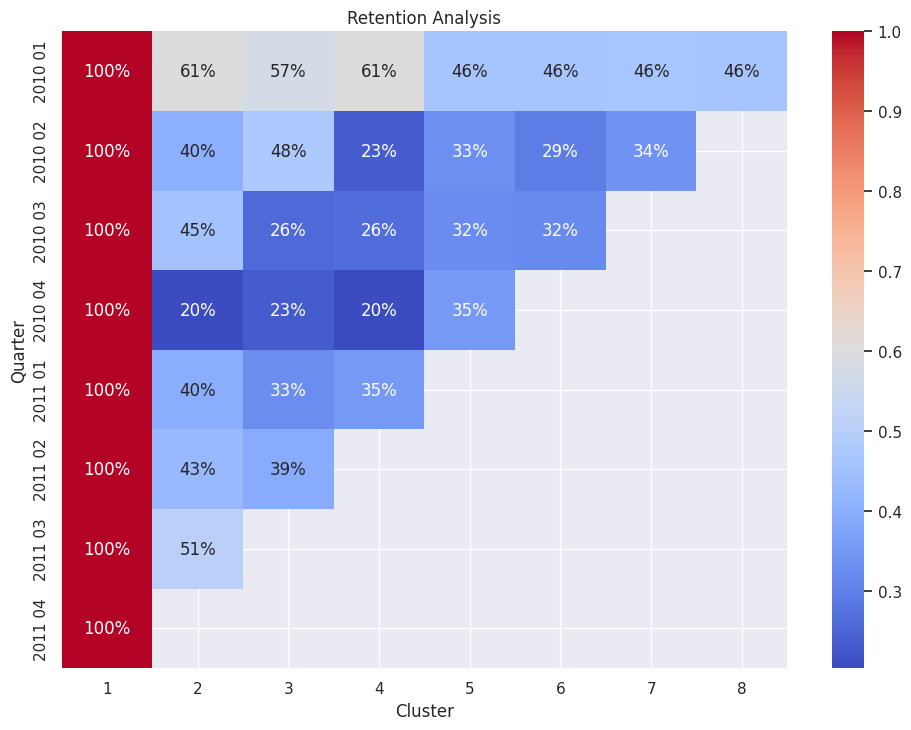

In [29]:
custi = custom.iloc[:, 0]

retention = custom.divide(custi, axis="rows")

retention = retention.round(3)

retention_corr = sns.heatmap(retention, annot=annot, cmap="coolwarm", fmt=".0%")

retention_corr.set_title("Retention Analysis")

retention_corr.set_ylabel("Quarter")

retention_corr.set_xlabel("Cluster");